# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [ ]:
# cv2.colorvector??

In [77]:
mp_holistic.FACEMESH_TESSELATION

frozenset({(302, 11),
           (363, 420),
           (217, 126),
           (236, 174),
           (455, 460),
           (347, 280),
           (439, 438),
           (22, 154),
           (98, 203),
           (352, 280),
           (370, 462),
           (7, 25),
           (51, 195),
           (5, 195),
           (336, 337),
           (455, 289),
           (456, 437),
           (202, 204),
           (41, 74),
           (150, 169),
           (285, 441),
           (111, 123),
           (134, 198),
           (446, 265),
           (414, 413),
           (314, 17),
           (279, 294),
           (322, 410),
           (420, 456),
           (148, 152),
           (196, 236),
           (52, 105),
           (131, 49),
           (247, 30),
           (175, 152),
           (258, 257),
           (9, 336),
           (446, 255),
           (448, 261),
           (120, 231),
           (321, 375),
           (11, 72),
           (236, 51),
           (371, 355),
        

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.face_landmarks.landmark)

468

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

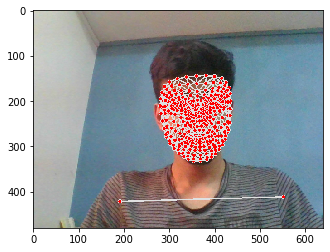

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
len(results.pose_landmarks.landmark)

33

In [16]:
len(pose)

33

In [14]:
pose

[array([ 0.56116778,  0.48353854, -1.3245852 ,  0.99989974]),
 array([ 0.58795506,  0.40554276, -1.24778402,  0.99982387]),
 array([ 0.60546559,  0.40582365, -1.24808514,  0.99984384]),
 array([ 0.62590688,  0.40705821, -1.24847054,  0.99980068]),
 array([ 0.52560914,  0.40932804, -1.24881339,  0.99981219]),
 array([ 0.50423461,  0.41089454, -1.24793601,  0.9998318 ]),
 array([ 0.48481908,  0.41422191, -1.24820673,  0.99980795]),
 array([ 0.65786159,  0.4476614 , -0.72590047,  0.9998349 ]),
 array([ 0.45358977,  0.4597882 , -0.70121193,  0.99985754]),
 array([ 0.60006446,  0.56273359, -1.1200254 ,  0.99988592]),
 array([ 0.52188933,  0.56927413, -1.1146028 ,  0.99988824]),
 array([ 0.86377156,  0.85693204, -0.39339036,  0.99783844]),
 array([ 0.29938871,  0.8785004 , -0.42573276,  0.99713194]),
 array([ 0.98913085,  1.28506124, -0.52356255,  0.15432179]),
 array([ 0.20931284,  1.37052023, -0.89363831,  0.29319978]),
 array([ 0.98165065,  1.67627788, -1.17899489,  0.13393408]),
 array([

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404) 


In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.56116778,  0.48353854, -1.3245852 , ...,  0.        ,
        0.        ,  0.        ])

In [22]:
468*3+33*4+21*3+21*3

1662

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.56116778,  0.48353854, -1.3245852 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'no'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 10 frames in length
sequence_length = 10

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [28]:
# For making directory of signs
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [29]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [30]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'hello': 0, 'thanks': 1, 'no': 2}

In [34]:
#  Bringing data and structureing them
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [37]:
np.array(sequences).shape

(30, 10, 1662)

In [38]:
np.array(labels).shape

(30,)

In [39]:
X = np.array(sequences)

In [40]:
X.shape

(30, 10, 1662)

In [41]:
y = to_categorical(labels).astype(int)

In [42]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [44]:
y_test.shape

(2, 3)

# 7. Build and Train LSTM Neural Network

In [45]:
from tensorflow.keras.models import Sequential #api
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [47]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [48]:
res = [.7, 0.2, 0.1]

In [49]:
actions[np.argmax(res)]

'hello'

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 1.0989 - categorical_accuracy: 0.3571
Epoch 2/2000
1/1 [==============================] - 1s 868ms/step - loss: 1.1047 - categorical_accuracy: 0.3571
Epoch 3/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.1385 - categorical_accuracy: 0.3571
Epoch 4/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.1004 - categorical_accuracy: 0.3571
Epoch 5/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.0929 - categorical_accuracy: 0.3571
Epoch 6/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.0866 - categorical_accuracy: 0.3571
Epoch 7/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.0846 - categorical_accuracy: 0.3929
Epoch 8/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.1143 - categorical_accuracy: 0.6071
Epoch 9/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.0959 - categorical_accuracy: 0.3571
Ep

1/1 [==============================] - 0s 22ms/step - loss: 0.6376 - categorical_accuracy: 0.7143
Epoch 141/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.5696 - categorical_accuracy: 0.7143
Epoch 142/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.5288 - categorical_accuracy: 0.7143
Epoch 143/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.5109 - categorical_accuracy: 0.7143
Epoch 144/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.4832 - categorical_accuracy: 0.7500
Epoch 145/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.4619 - categorical_accuracy: 0.8571
Epoch 146/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.4334 - categorical_accuracy: 0.8214
Epoch 147/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.4726 - categorical_accuracy: 0.7500
Epoch 148/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.4305 - categorical_accuracy: 0.785

1/1 [==============================] - 0s 25ms/step - loss: 9.1512e-05 - categorical_accuracy: 1.0000
Epoch 283/2000
1/1 [==============================] - 0s 22ms/step - loss: 8.9639e-05 - categorical_accuracy: 1.0000
Epoch 284/2000
1/1 [==============================] - 0s 23ms/step - loss: 8.7779e-05 - categorical_accuracy: 1.0000
Epoch 285/2000
1/1 [==============================] - 0s 22ms/step - loss: 8.6034e-05 - categorical_accuracy: 1.0000
Epoch 286/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.4301e-05 - categorical_accuracy: 1.0000
Epoch 287/2000
1/1 [==============================] - 0s 24ms/step - loss: 8.2590e-05 - categorical_accuracy: 1.0000
Epoch 288/2000
1/1 [==============================] - 0s 25ms/step - loss: 8.0943e-05 - categorical_accuracy: 1.0000
Epoch 289/2000
1/1 [==============================] - 0s 18ms/step - loss: 7.9394e-05 - categorical_accuracy: 1.0000
Epoch 290/2000
1/1 [==============================] - 0s 24ms/step - loss: 7.78

1/1 [==============================] - 0s 31ms/step - loss: 1.2091e-05 - categorical_accuracy: 1.0000
Epoch 423/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.1874e-05 - categorical_accuracy: 1.0000
Epoch 424/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.1636e-05 - categorical_accuracy: 1.0000
Epoch 425/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.1423e-05 - categorical_accuracy: 1.0000
Epoch 426/2000
1/1 [==============================] - 0s 29ms/step - loss: 1.1197e-05 - categorical_accuracy: 1.0000
Epoch 427/2000
1/1 [==============================] - 0s 31ms/step - loss: 1.1001e-05 - categorical_accuracy: 1.0000
Epoch 428/2000
1/1 [==============================] - 0s 30ms/step - loss: 1.0831e-05 - categorical_accuracy: 1.0000
Epoch 429/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.0652e-05 - categorical_accuracy: 1.0000
Epoch 430/2000
1/1 [==============================] - 0s 30ms/step - loss: 1.04

KeyboardInterrupt: 

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [53]:
model.predict(X_test)

array([[2.5867617e-05, 9.9997270e-01, 1.3786230e-06],
       [7.3706213e-10, 1.2254260e-16, 1.0000000e+00]], dtype=float32)

In [54]:
actions[np.argmax(res[0])]

'hello'

In [55]:
actions[np.argmax(y_test[0])]

'thanks'

# 9. Save Weights

In [56]:
model.save("action.h5")

In [ ]:
del model

In [57]:
model.load_weights("action.h5")

# 10. Evaluation using Confusion Matrix and Accuracy

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [59]:
yhat = model.predict(X_test)

In [60]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [61]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]], dtype=int64)

In [62]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [63]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

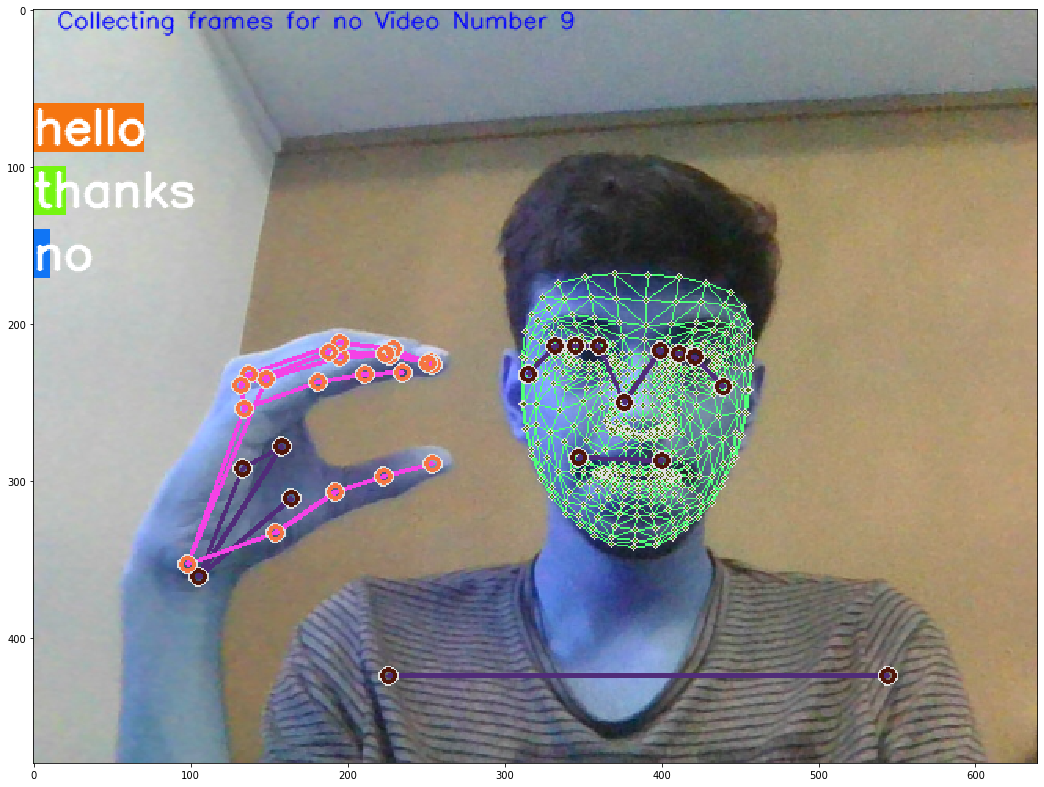

In [64]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [65]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [66]:
len(sequence)

TypeError: object of type 'int' has no len()

In [67]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [74]:
sequence.reverse()

In [75]:
sequence[-30:]

[array([ 0.56457782,  0.53447443, -0.79644978, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56477112,  0.5344857 , -0.79375231, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56490523,  0.53449047, -0.78844064, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56498718,  0.5334875 , -0.80895722, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56515718,  0.53392982, -0.86384928, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56486309,  0.53389418, -1.10099578, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56404078,  0.53474176, -1.10411048, ...,  0.09208523,
         0.97269362, -0.0782221 ]),
 array([ 0.56396449,  0.53085464, -0.78789324, ...,  0.14427608,
         0.71080023, -0.02762718]),
 array([ 0.56436944,  0.53096473, -0.79187977, ...,  0.12251784,
         0.44104773, -0.02464305]),
 array([ 0.5654251 ,  0.52876264, -0.81470048, ...,  0.12701917,
         0.43606663,  0.01

In [76]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:10]
        sequence.append(keypoints)
        sequence = sequence[-10:]
        
        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.Solutio

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

In [70]:
cap.release()
cv2.destroyAllWindows()

In [71]:
res[np.argmax(res)] > threshold

True

In [72]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [73]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[2.5867543e-05, 9.9997270e-01, 1.3786230e-06]], dtype=float32)